In [124]:
#OpenSeesPy and Opsvis
from openseespy.opensees import *
import opsvis as opsv #For OpenSeesPy visualisation

import math
import numpy as np
import matplotlib.pyplot as plt

## Structure Data Entry and Constants

In [125]:
E = 200*10**9 #(N/m^2) Young' Modulus
A = 0.03 #(m^2) Cross-sectional area
Iz = 300*10**-6 #(m^4) Second moment of area

nBays = 2
h_bay = 5
w_bay = 10

fixity = (1,1,1)


## OpenSeesPy - Initialisation

In [126]:
# Remove any existing model from memory
wipe()

# Initialise the model - 2 dimensions and 3 degrees of freedom per node
model('basic', '-ndm', 2, '-ndf', 3)

## OpenSeesPy - Model Definition

### Nodes

In [127]:
for i in range(nBays+1):
    index = i+1
    xCoord = i*w_bay

    #Base Node
    nodeTag=(2*index -1)
    yCoord = 0
    node(nodeTag, xCoord, yCoord)
    print(f'Base node with {nodeTag} is defined')

    #Eaves node
    nodeTag = 2*index
    yCoord = h_bay
    node(nodeTag, xCoord, yCoord)
    print(f'Eaves node with tag {nodeTag} is defined')

Base node with 1 is defined
Eaves node with tag 2 is defined
Base node with 3 is defined
Eaves node with tag 4 is defined
Base node with 5 is defined
Eaves node with tag 6 is defined


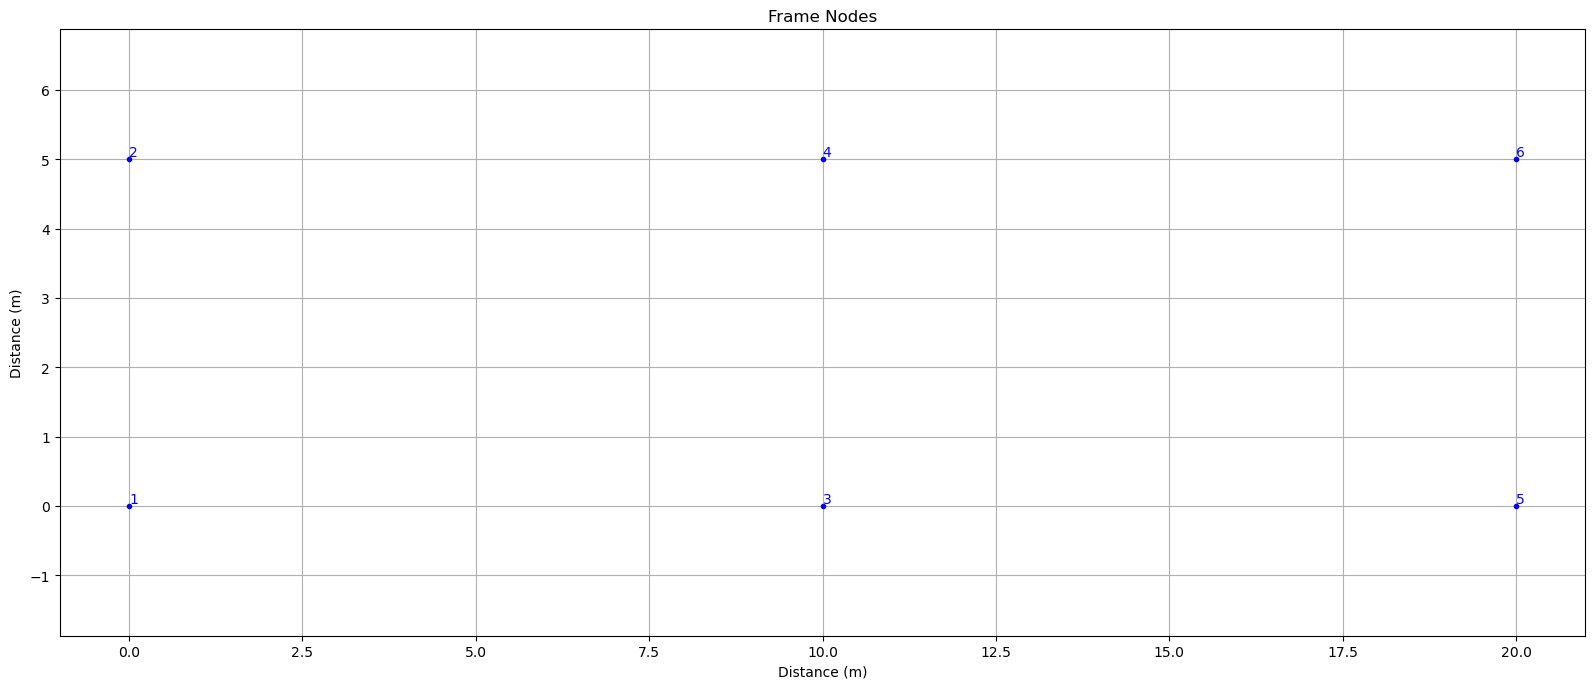

In [128]:
def plotStructure(title):
    opsv.plot_model(fig_wi_he=(50,20))
    plt.title(title)
    plt.xlabel('Distance (m)')
    plt.ylabel('Distance (m)')
    plt.grid()
    plt.show()

plotStructure('Frame Nodes')

### Elements

In [129]:
transfType = 'Linear'
transfTag = 1
geomTransf(transfType, transfTag)

In [130]:
#Define columns
for i in range (nBays+1):
    eleTag = i+1
    endBottom = (2*eleTag)-1
    endTop = 2*eleTag

    element('elasticBeamColumn', eleTag, endBottom, endTop, A, E , Iz, transfTag)
    print(f'Column element with tag {eleTag} defined')

for i in range (nBays):
    index=i+1
    eleTag = nBays+1+index
    endLeft = 2*index
    endRight = 2*index+2

    element('elasticBeamColumn', eleTag, endLeft, endRight, A, E , Iz, transfTag)
    print(f'Beam/Rafter element with tag {eleTag} defined')


Column element with tag 1 defined
Column element with tag 2 defined
Column element with tag 3 defined
Beam/Rafter element with tag 4 defined
Beam/Rafter element with tag 5 defined


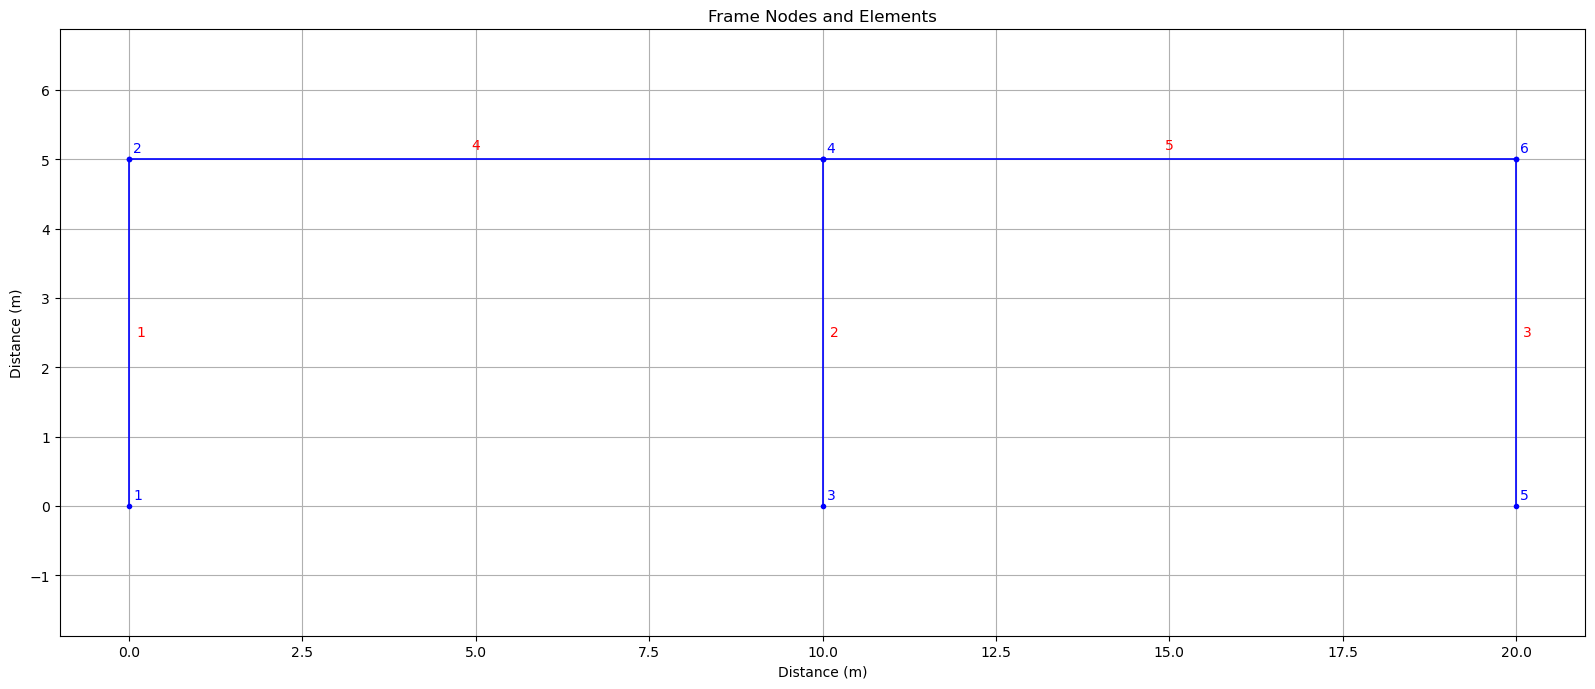

In [131]:
plotStructure('Frame Nodes and Elements')

### Supports

In [132]:
for i in range(nBays+1):
    index = i+1
    nodeTag = int((2*index)-1)

    nodeFixity = (nodeTag,) + fixity #(1,1,1,1)

    fix(*nodeFixity)


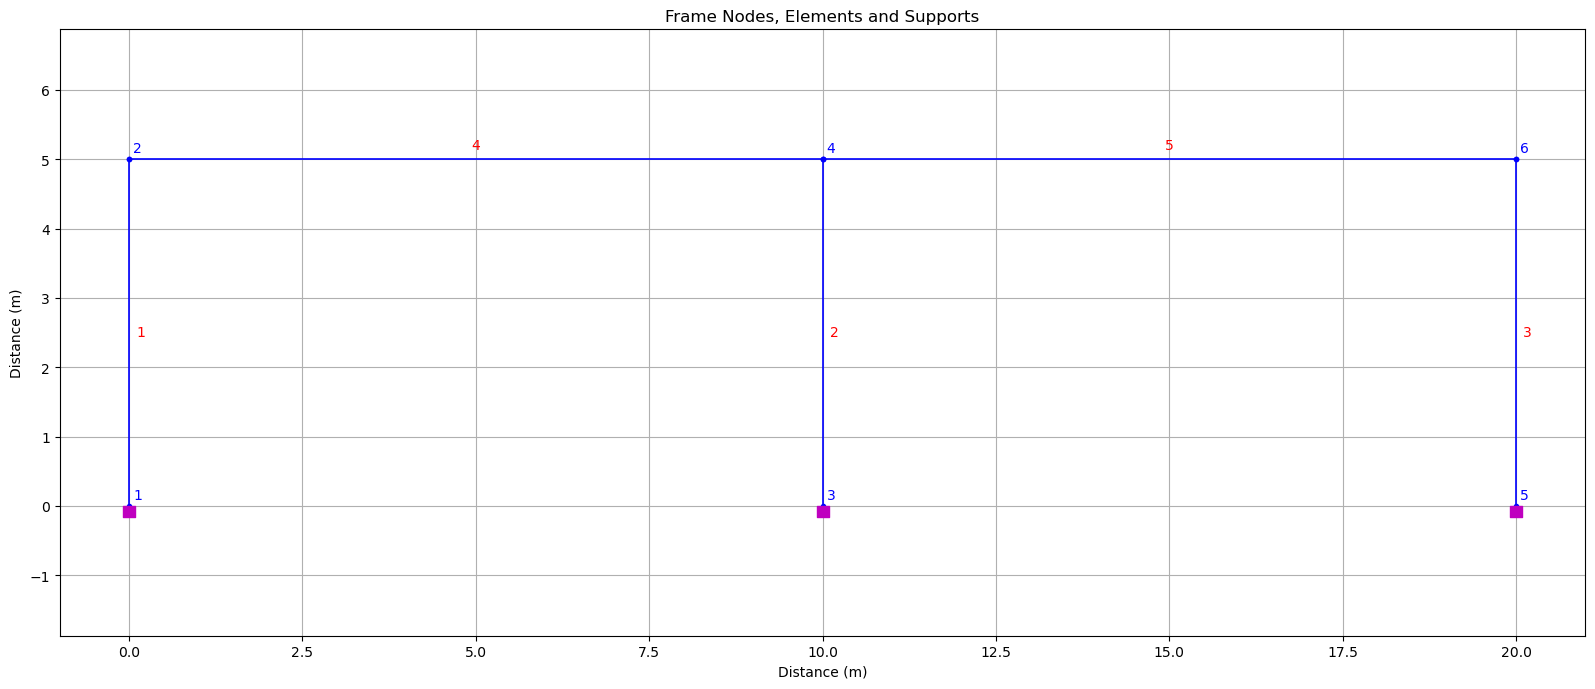

In [133]:
plotStructure("Frame Nodes, Elements and Supports")

In [134]:
timeSeries('Constant', 1)

pattern("Plain", 1, 1)

In [135]:
eleLoad('-ele', 4, '-type', '-beamUniform', -10000)
eleLoad('-ele', 5, '-type', '-beamUniform', -20000)

In [136]:
load(2, 200000, 0,0)

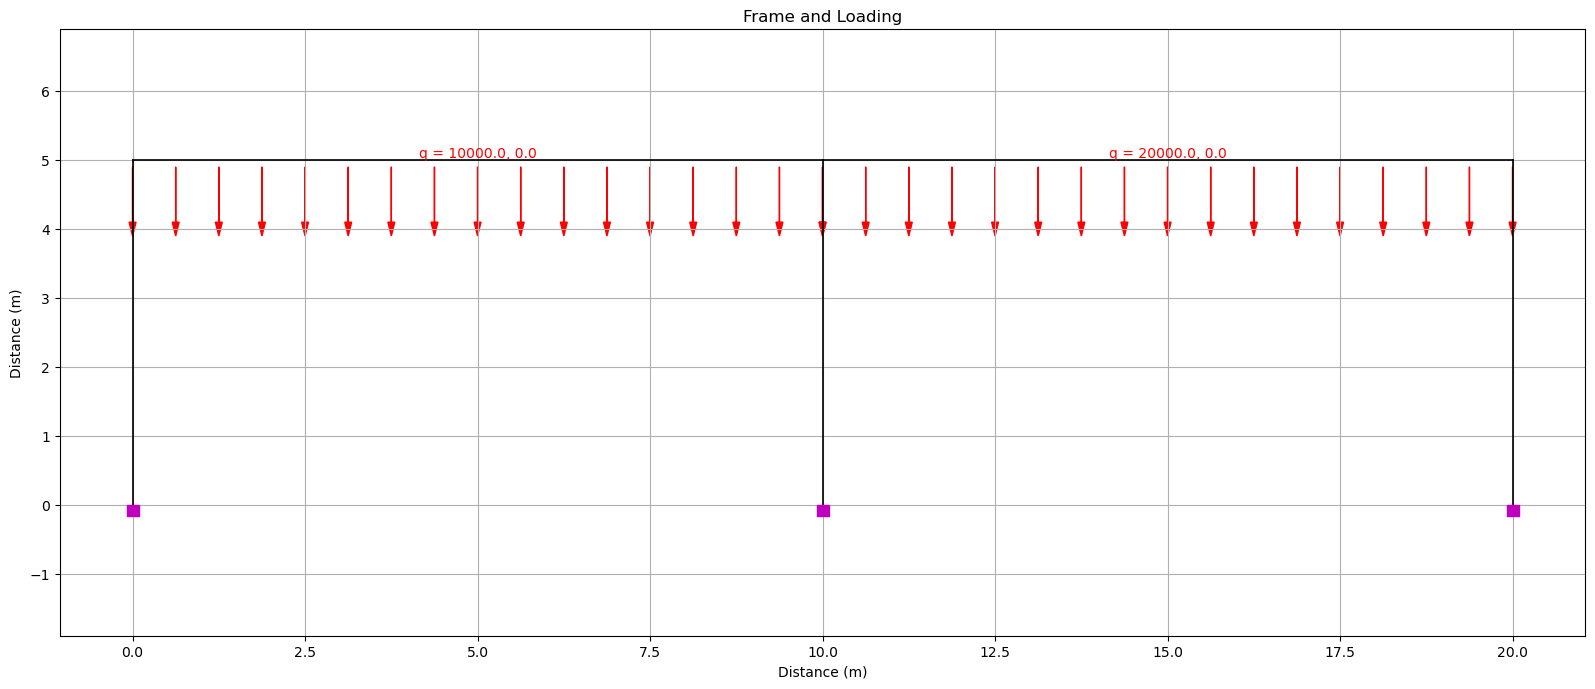

In [137]:
def plotLoads(title):
    opsv.plot_loads_2d(sfac = True, fig_wi_he=(50,20))
    plt.title(title)
    plt.xlabel('Distance (m)')
    plt.ylabel('Distance (m)')
    plt.grid()
    plt.show()

plotLoads('Frame and Loading')

### Analysis

In [138]:
# Create SOE
system('BandGeneral')

numberer('RCM')

constraints('Transformation')

integrator('LoadControl', 1)

algorithm('Linear')

analysis('Static')

analyze(1)

0

### Deflection

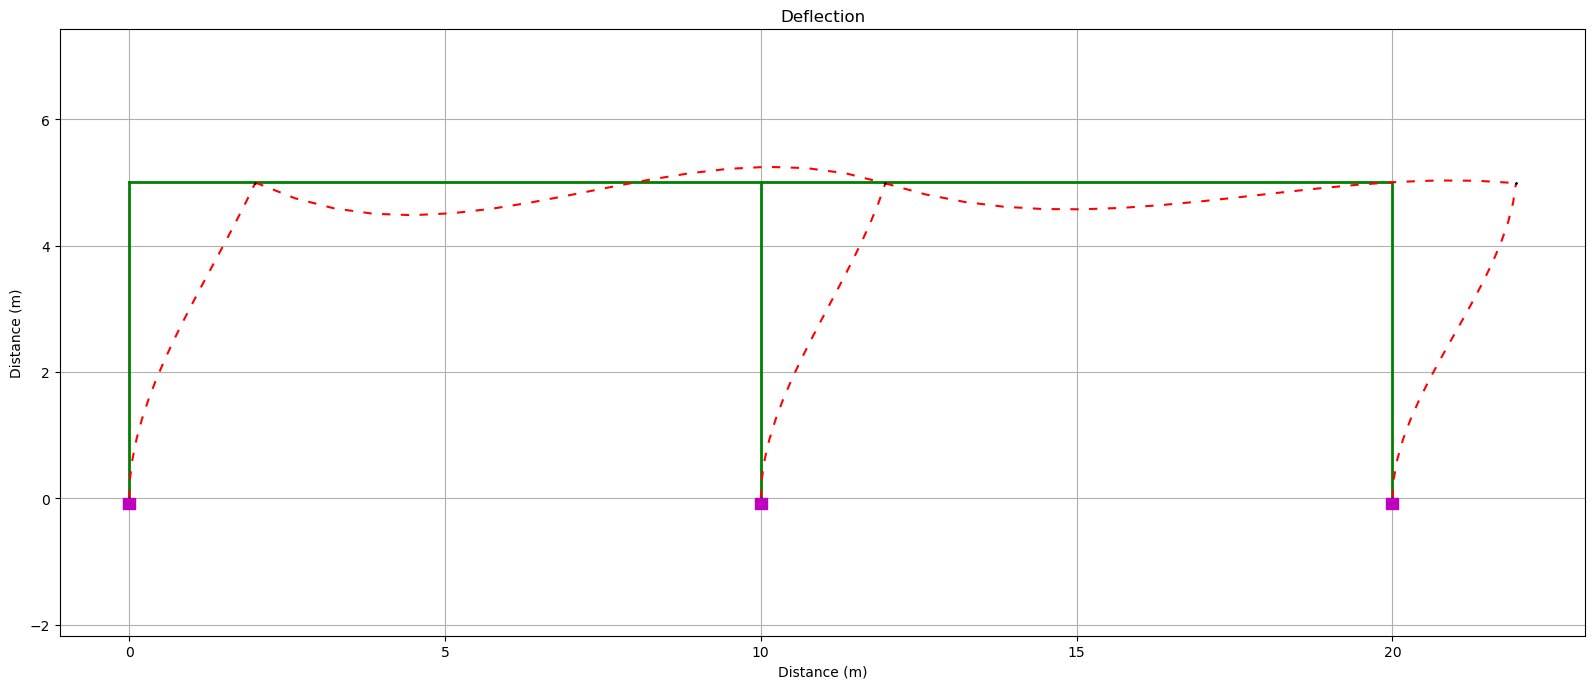

The scale factor on deflection is 107.35


In [139]:
s = opsv.plot_defo(fig_wi_he=(50,20),
                   fmt_defo={'color': 'red', 'linestyle': (0, (4,5)), 'linewidth': 1.5},
                   fmt_undefo={'color': 'green', 'linestyle': 'solid', 'linewidth': 2,}
                   )
plt.title('Deflection')
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.grid()
plt.show()

print(f'The scale factor on deflection is {round(s,2)}')

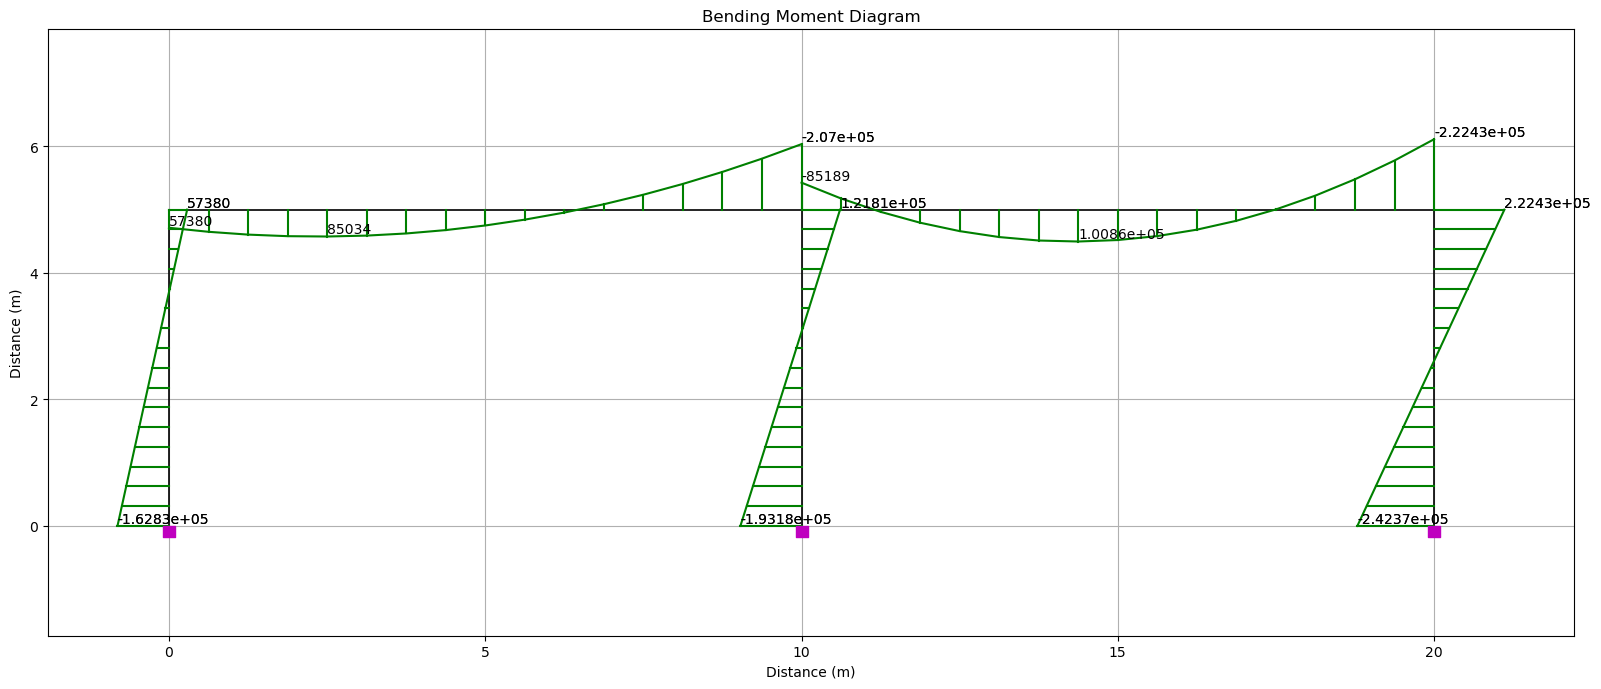

In [140]:
mFac = 5.e-6

opsv.section_force_diagram_2d('M', mFac, fig_wi_he=(50,20),
                              fmt_secforce1={'color': 'green'},
                              fmt_secforce2={'color': 'green'}
                              )
plt.title('Bending Moment Diagram')
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.grid()
plt.show()

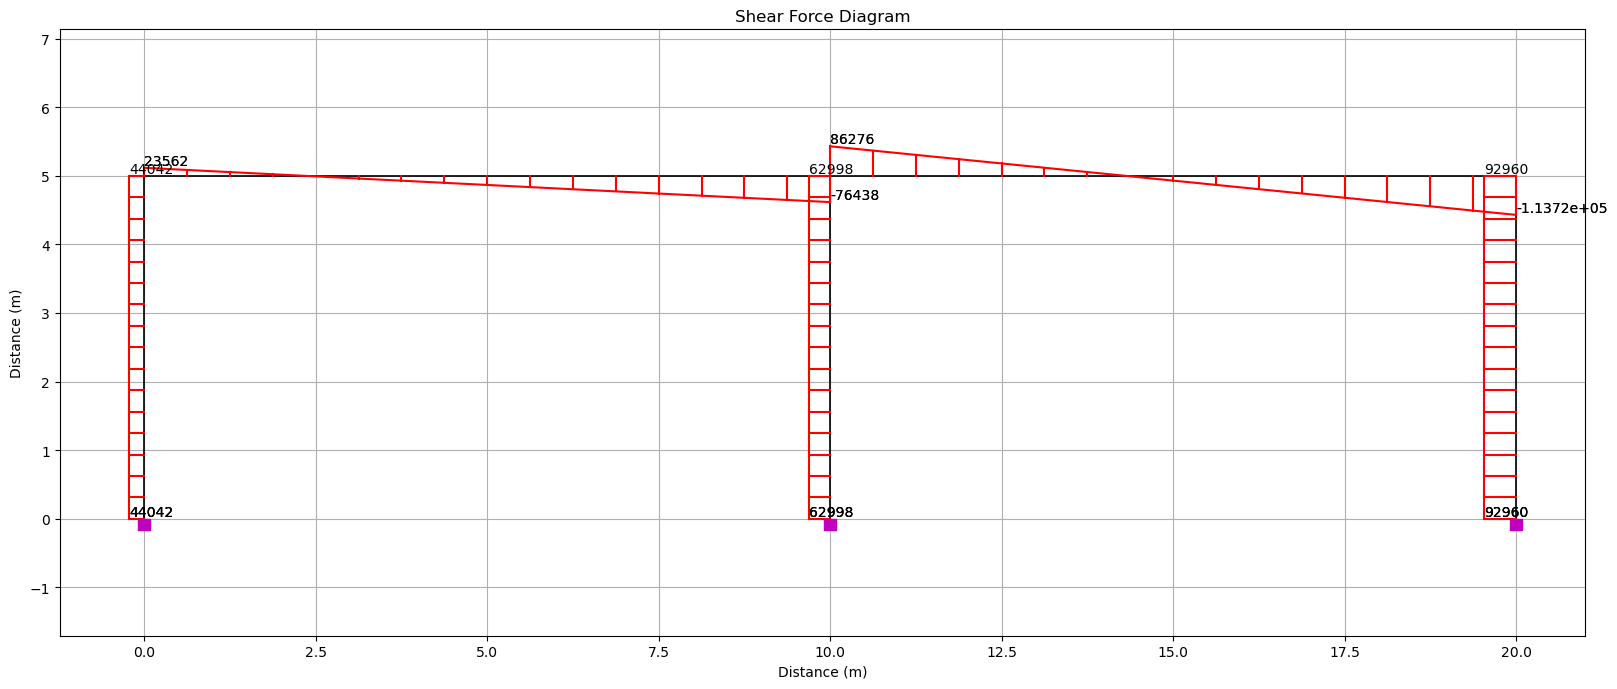

In [141]:
vFac = 15.e-6

opsv.section_force_diagram_2d('V', mFac, fig_wi_he=(50,20),
                              fmt_secforce1={'color': 'red'},
                              fmt_secforce2={'color': 'red'}
                              )
plt.title('Shear Force Diagram')
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.grid()
plt.show()

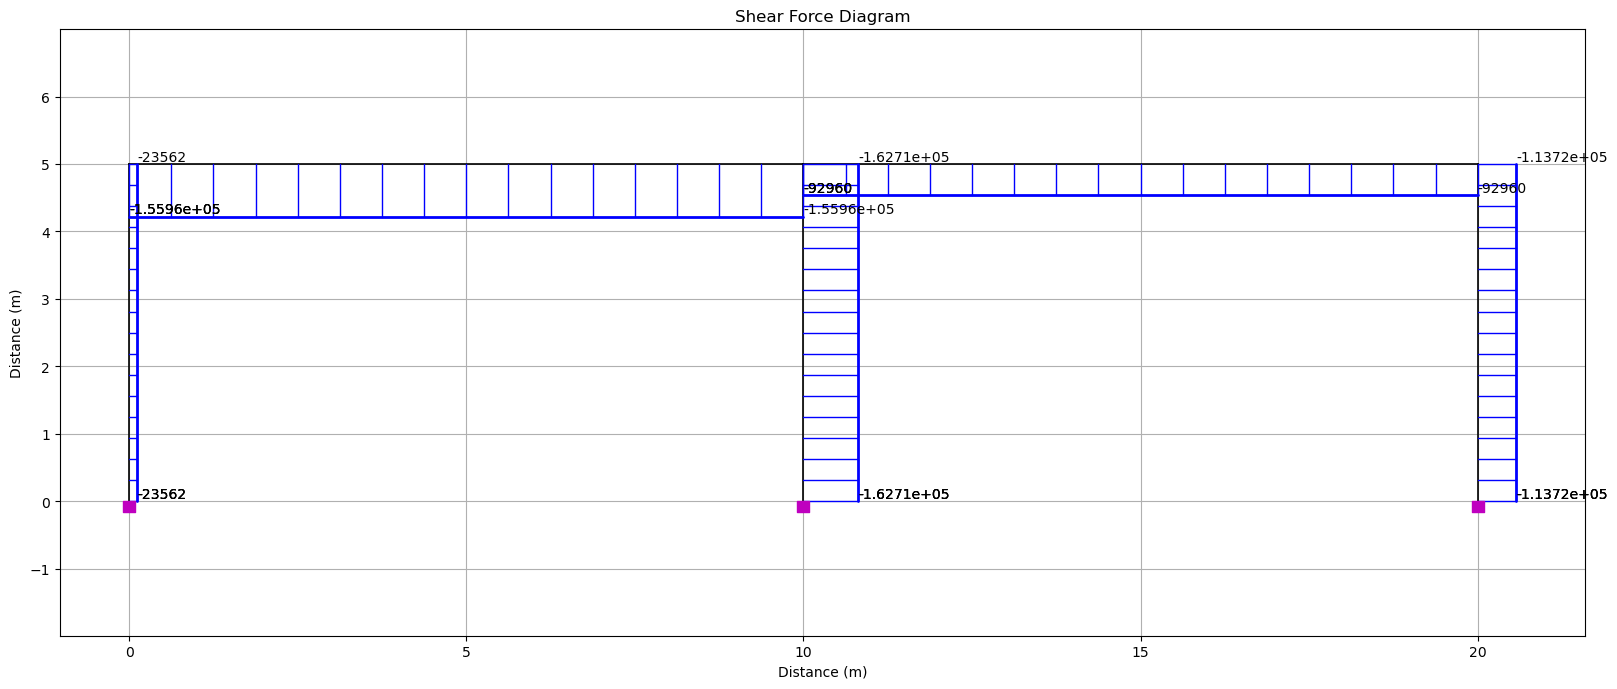

In [142]:
nFac = 5.e-6

opsv.section_force_diagram_2d('N', nFac, fig_wi_he=(50,20))
plt.title('Shear Force Diagram')
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.grid()
plt.show()

In [144]:
printModel('-node', 2)


 Node: 2
	Coordinates  : 0 5 
	Disps: 0.0186306 -1.96348e-05 -0.00439375 
	 unbalanced Load: 200000 0 0 
	ID : 6 7 8 

